## Import Libraries

In [203]:
import pandas as pd
import numpy as np
import matplotlib as plt
import datetime as dt


from matplotlib import *
import sys
from pylab import *

In [204]:
df = pd.read_excel('radialData.xlsx', sheet_name='data_missingvalues')

In [205]:
df.head()

,Times,Procedure
0,00:00:16,G
1,00:00:17,A
2,00:00:23,D
3,00:00:27,B
4,00:00:34,I


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7627 entries, 0 to 7626
Data columns (total 2 columns):
Times        7627 non-null object
Procedure    7627 non-null object
dtypes: object(2)
memory usage: 119.3+ KB


In [207]:
#set type of time column to datetime; set type of procedure column to string
df['Times'] = df['Times'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%H:%M:%S'))
df['Procedure'] = df['Procedure'].apply(lambda x: str(x))

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7627 entries, 0 to 7626
Data columns (total 2 columns):
Times        7627 non-null datetime64[ns]
Procedure    7627 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 119.3+ KB


In [209]:
#extract hour from time column
df['Hour'] = df['Times'].dt.hour

In [210]:
df.head(2)

,Times,Procedure,Hour
0,1900-01-01 00:00:16,G,0
1,1900-01-01 00:00:17,A,0


## Create Padding for "No Record" Values, Append to data

In [212]:
hour_list = [x*1 for x in range(0, 23+1)]

pad_height = 24
pad_width = len(df.columns) 
df_0 = pd.DataFrame(0, index=range(pad_height), columns=range(pad_width))
df_0.columns=df.columns.values
df_0['Hour'] = hour_list

In [213]:
df = df.append(df_0)

## Radial Bar Chart Plot

(0.0, 6.283185307179586, 0.0, 769.75)

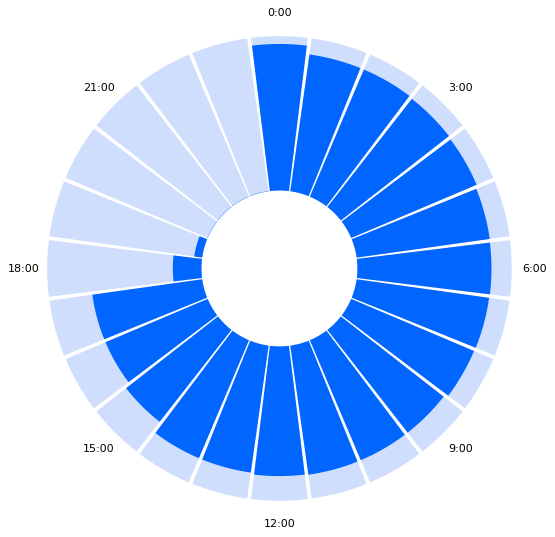

In [214]:
wedges = len(df['Hour'].value_counts()) # number of wedges (should be 24, for 24 hours)
procCounts = df['Hour'].value_counts() # height of bars is the number of observations within that hour

theta=np.arange(0,2*np.pi,2*np.pi/wedges)
width = (2.2*np.pi)/wedges *.85
bottom = 250 # size of the inner circle


fig = plt.figure(figsize=(8,8), dpi=80, facecolor='w')
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)


bars = ax.bar(theta, max(procCounts)+25, width=width, bottom=bottom, color="#CFDEFD") #set background wedge color
bars = ax.bar(theta, procCounts, width=width, bottom=bottom, color='#0066ff') #wedges by hour

N = len(procCounts)

ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.grid(False)
ax.spines['polar'].set_visible(False)
ax.set_rticks([])

ticks = [f"{i}:00" for i in range(0, 24, 3)]
ax.set_xticklabels(ticks)

#ax.set_xticks(theta)
plt.axis('on')

(0.0, 6.283185307179586, 0.0, 769.75)

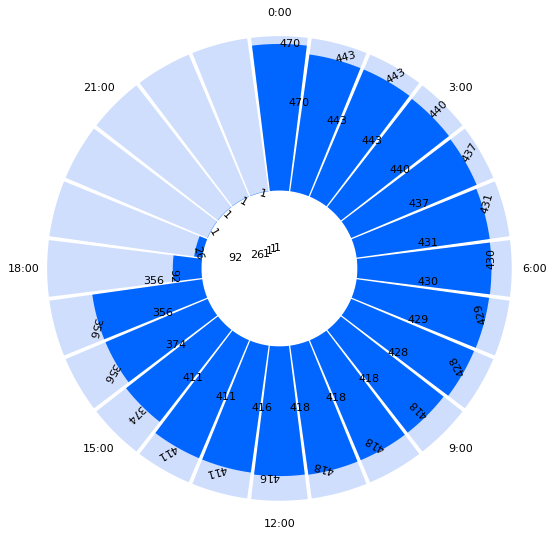

In [216]:
wedges = len(df['Hour'].value_counts()) # number of wedges (should be 24, for 24 hours)
procCounts = df['Hour'].value_counts() # height of bars is the number of observations within that hour

theta=np.arange(0,2*np.pi,2*np.pi/wedges)
width = (2.2*np.pi)/wedges *.85
bottom = 250 # size of the inner circle


fig = plt.figure(figsize=(8,8), dpi=80, facecolor='w')
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)


bars1 = ax.bar(theta, max(procCounts)+25, width=width, bottom=bottom, color="#CFDEFD") #set background wedge color

rotations = [np.degrees(i) for i in theta]
for i in rotations: i = int(i)
for x, bar, rotation, label in zip(theta, bars, rotations, procCounts):
     height = bar.get_height() + 50
     ax.text(x + bar.get_width()/2, height, label, ha='center', va='bottom')


for x, bar, rotation, label in zip(theta, bars, rotations, procCounts):
    lab = ax.text(x,bottom+bar.get_height() , label, 
             ha='left', va='center', rotation=rotation, rotation_mode="anchor",)  

bars = ax.bar(theta, procCounts, width=width, bottom=bottom, color='#0066ff') #wedges by hour

N = len(procCounts)

ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.grid(False)
ax.spines['polar'].set_visible(False)
ax.set_rticks([])

ticks = [f"{i}:00" for i in range(0, 24, 3)]
ax.set_xticklabels(ticks)



plt.axis('on')